In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
d2='/content/drive/MyDrive/youtoxic_english_1000.csv'
d1 = '/content/drive/MyDrive/train.csv'


In [ ]:
import pandas as pd
# file_path = "/content/drive/My Drive/path_to_your_dataset.csv"
df1 = pd.read_csv(d1)
df2 = pd.read_csv(d2)

In [ ]:
df1.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# f1= '/content/sample_data/train.csv'
# f2= '/content/sample_data/youtoxic_english_1000.csv'

# df1 = pd.read_csv(f1)
# df2= pd.read_csv(f2)

In [ ]:
df2.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Process df1
df1['Toxic'] = df1.iloc[:, 2:].any(axis=1)
df1_processed = df1[['comment_text', 'Toxic']].rename(columns={'comment_text': 'Text'})

# Process df2
df2['Toxic'] = df2.iloc[:, 3:].any(axis=1)
df2_processed = df2[['Text', 'Toxic']]

# Combine df1_processed and df2_processed
df = pd.concat([df1_processed, df2_processed], ignore_index=True)

# Display the first few rows of final_df
print(df.head())

                                                Text  Toxic
0  Explanation\nWhy the edits made under my usern...  False
1  D'aww! He matches this background colour I'm s...  False
2  Hey man, I'm really not trying to edit war. It...  False
3  "\nMore\nI can't make any real suggestions on ...  False
4  You, sir, are my hero. Any chance you remember...  False


In [ ]:
df.describe()

,Text,Toxic
count,160571,160571
unique,160568,2
top,run them over,False
freq,3,143884


In [ ]:
# Check data types and missing values
print(df.dtypes)
print(df.isnull().sum())

Text     object
Toxic      bool
dtype: object
Text     0
Toxic    0
dtype: int64


In [ ]:
# Check for duplicate comments
duplicate_rows = df[df.duplicated(subset=['Text'], keep=False)]
print("Duplicate rows based on 'Text' column:")
print(duplicate_rows)

# Drop duplicate comments
df.drop_duplicates(subset=['Text'], keep='first', inplace=True)

# Confirm duplicates are removed
print("Number of rows after removing duplicates:", len(df))

# Reindex the DataFrame after dropping duplicates
df.reset_index(drop=True, inplace=True)

Duplicate rows based on 'Text' column:
                 Text  Toxic
160163  RUN THEM OVER   True
160213  run them over   True
160228  run them over   True
160248  run them over   True
160270  RUN THEM OVER   True
Number of rows after removing duplicates: 160568


In [ ]:
# Distribution of 'Toxic' column
toxic_distribution = df['Toxic'].value_counts()
print(toxic_distribution)

Toxic
False    143884
True      16684
Name: count, dtype: int64


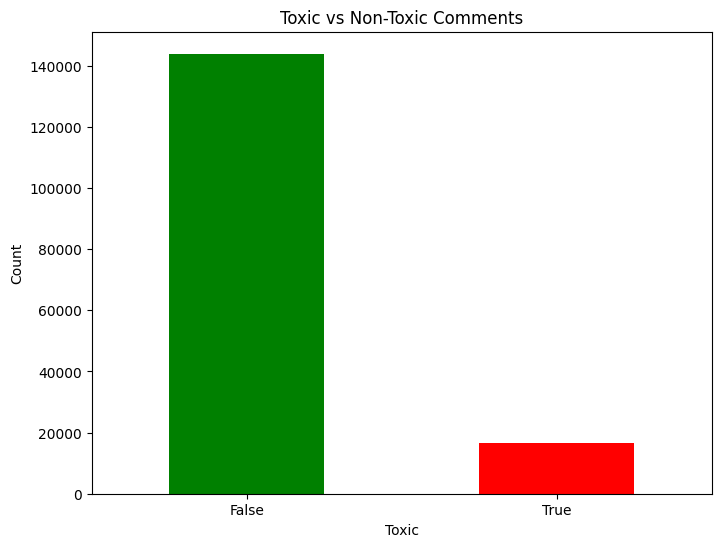

In [ ]:
# Bar plot for toxic vs non-toxic comments
plt.figure(figsize=(8, 6))
toxic_counts = df['Toxic'].value_counts()
toxic_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Toxic vs Non-Toxic Comments')
plt.xlabel('Toxic')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

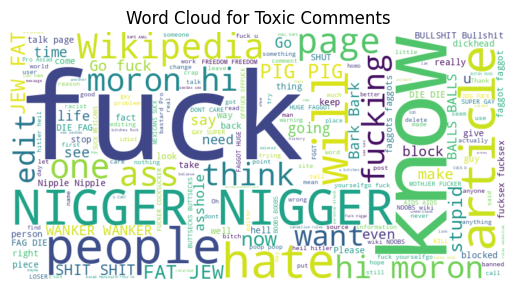

In [ ]:
# Word Cloud for toxic and non-toxic comments
toxic_comments = ' '.join(df[df['Toxic']]['Text'])
wordcloud_toxic = WordCloud(width=800, height=400, background_color='white').generate(toxic_comments)
plt.imshow(wordcloud_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Toxic Comments')
plt.show()

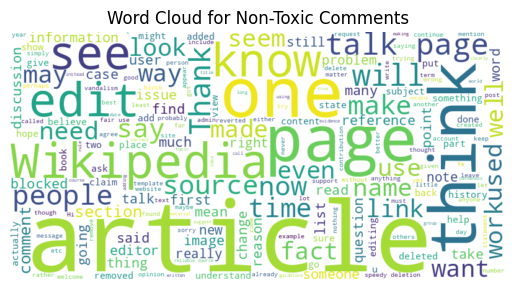

In [ ]:
non_toxic_comments = ' '.join(df[~df['Toxic']]['Text'])
wordcloud_non_toxic = WordCloud(width=800, height=400, background_color='white').generate(non_toxic_comments)
plt.imshow(wordcloud_non_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Toxic Comments')
plt.show()

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [ ]:
# clean the comment_text in train_df [Thanks to Pulkit Jha for the useful pointer.]
df['Text'] = df['Text'].map(lambda com : clean_text(com))

In [ ]:
df

,Text,Toxic
0,explanation why the edits made under my userna...,False
1,d aww he matches this background colour i am s...,False
2,hey man i am really not trying to edit war it ...,False
3,more i cannot make any real suggestions on imp...,False
4,you sir are my hero any chance you remember wh...,False
...,...,...
160563,i remember that they sent in the national defe...,False
160564,stats don t represent the problem race baiting...,True
160565,the quote from the mother wow that hit hard ve...,False
160566,this video is so racist,False


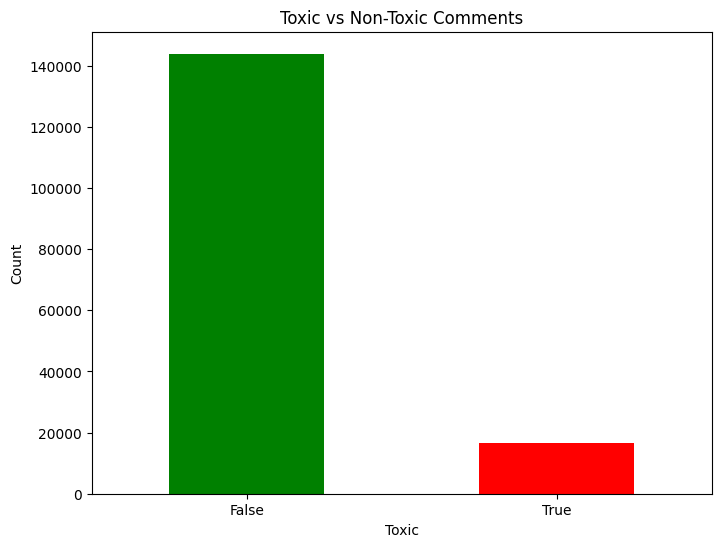

In [ ]:
# Bar plot for toxic vs non-toxic comments
plt.figure(figsize=(8, 6))
toxic_counts = df['Toxic'].value_counts()
toxic_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Toxic vs Non-Toxic Comments')
plt.xlabel('Toxic')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Vectorize the text data using TF-IDF
vect = TfidfVectorizer(max_features=5000, stop_words='english')
X = vect.fit_transform(df['Text'])
Y = df['Toxic']

In [ ]:
# Import SMOTE from imblearn
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE()

# Apply SMOTE for oversampling
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [ ]:
# Convert the oversampled data back to a DataFrame
df_resampled = pd.DataFrame(X_resampled.todense(), columns=vect.get_feature_names_out())
df_resampled['Toxic'] = y_resampled

# Check the distribution after oversampling
toxic_distribution_after = df_resampled['Toxic'].value_counts()
print("\nDistribution after SMOTE:")
print(toxic_distribution_after)


Distribution after SMOTE:
Toxic
False    143884
True     143884
Name: count, dtype: int64


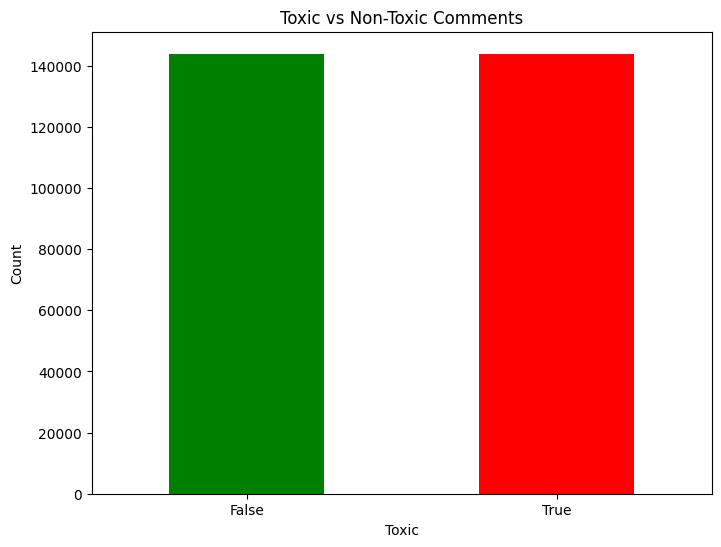

In [ ]:
# Bar plot for toxic vs non-toxic comments
plt.figure(figsize=(8, 6))
toxic_counts = df_resampled['Toxic'].value_counts()
toxic_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Toxic vs Non-Toxic Comments')
plt.xlabel('Toxic')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled[:10000], y_resampled[:10000], test_size=0.2, random_state=42)

In [ ]:
# Build the neural network model with Input layer
model = Sequential([
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train.toarray(), y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8772 - loss: 0.4963 - val_accuracy: 0.8938 - val_loss: 0.2774
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9018 - loss: 0.2518 - val_accuracy: 0.9119 - val_loss: 0.2257
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9341 - loss: 0.1814 - val_accuracy: 0.9312 - val_loss: 0.1944
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9558 - loss: 0.1351 - val_accuracy: 0.9362 - val_loss: 0.1833
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9682 - loss: 0.1016 - val_accuracy: 0.9375 - val_loss: 0.1870


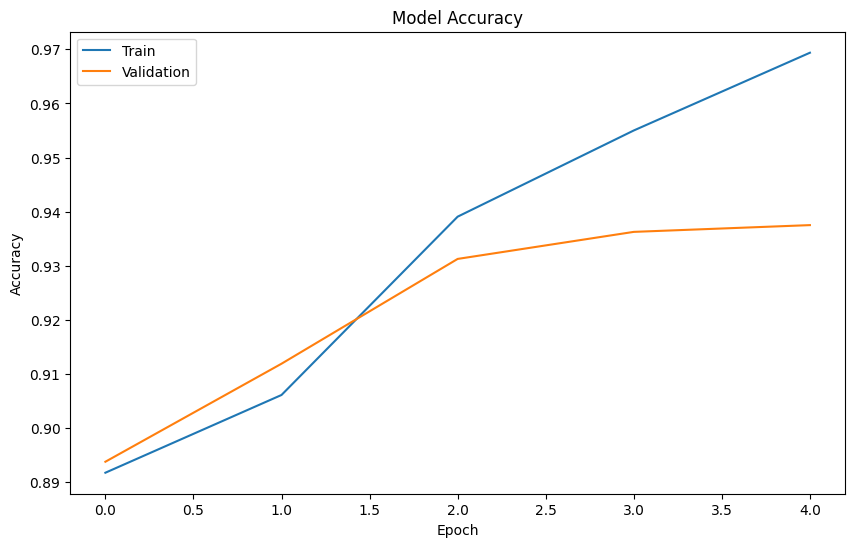

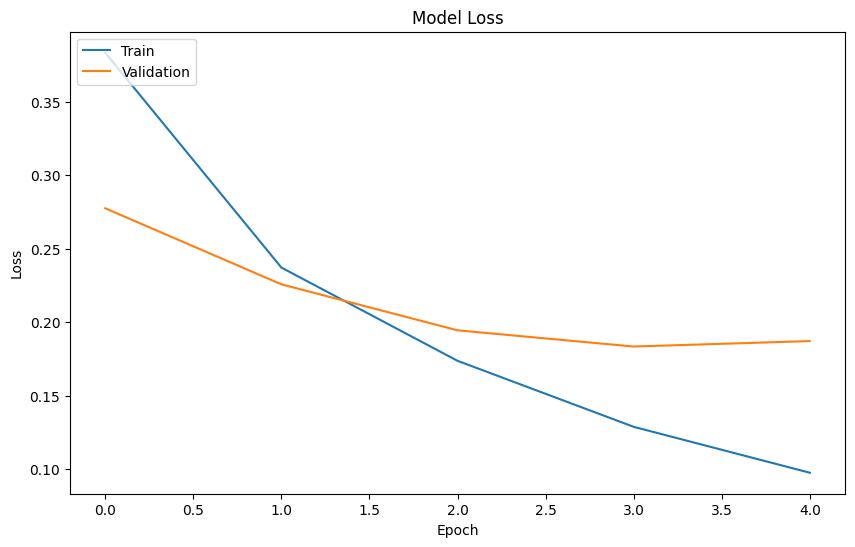

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - accuracy: 0.9359 - loss: 0.2155
Test Accuracy: 0.9359999895095825


In [ ]:
d3 ="/content/drive/MyDrive/cleaned_youtube_comments_with_sentiment.csv"

In [ ]:
df3 = pd.read_csv(d3)
# df3.head()

In [ ]:
df_cleaned = df3.drop(columns=['author', 'likes', 'time'])

In [ ]:
df_cleaned = df_cleaned.rename(columns={'text': 'Text', 'sentiment': 'Toxic'})

In [ ]:
df_cleaned.head()

,Text,Toxic
0,"thank you, leland. i don't believe it happened...",Negative
1,willie english i wondered. that's right! she w...,Negative
2,i am happy for the girl though. the girl will ...,Positive
3,"it would seem that mm is trying to be soft, wa...",Positive
4,residents are still not allowed to enter their...,Negative


In [ ]:
df_cleaned['Toxic'] = df_cleaned['Toxic'].map({'Negative': True, 'Positive': False})


In [ ]:
df_cleaned = df_cleaned.dropna(subset=['Toxic'])


In [ ]:
df_cleaned

,Text,Toxic
0,"thank you, leland. i don't believe it happened...",True
1,willie english i wondered. that's right! she w...,True
2,i am happy for the girl though. the girl will ...,False
3,"it would seem that mm is trying to be soft, wa...",False
4,residents are still not allowed to enter their...,True
5,oh my god she acts like she’s 15. she is insuf...,True
8,she is sooooooo pathetic. org what does harry ...,True
9,"i don't believe none, not even an inch of this...",False
10,"what a suitcase. please dear god, let willie e...",False
12,the hand on the forehead… who does that??,False


In [ ]:
# Transform the text data using the saved TF-IDF vectorizer
X_test_cleaned = vect.transform(df_cleaned['Text'])  # Vectorizing the text

# Convert labels to NumPy array
y_test_cleaned = df_cleaned['Toxic'].astype(int).values  # Ensure it's numerical

# Evaluate the model on the cleaned test dataset
loss, accuracy = model.evaluate(X_test_cleaned.toarray(), y_test_cleaned)
print(f'Test Accuracy: {accuracy}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.5404 - loss: 1.3771
Test Accuracy: 0.529411792755127


ValueError: Invalid dtype: object

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred_prob = model.predict(x_test.toarray())

# Convert probabilities to binary class labels (Threshold = 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy}")
print("\nClassification Report:\n", classification_rep)

# Save the trained model for future use
model.save("toxic_comment_model.h5")

# Save the TF-IDF vectorizer
import pickle
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vect, f)

print("Model and vectorizer saved successfully!")


In [ ]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Load or create the DataFrame (ensure the CSV file exists)
# #df_cleaned = pd.read_csv('cleaned_data.csv')

# # Vectorize text using TF-IDF
# vect = TfidfVectorizer(max_features=5000, stop_words='english')
# X_t = vect.fit_transform(df_cleaned['Text'])
# y_t = df_cleaned['Toxic']


In [ ]:
# # Load your trained model (assuming you saved it using joblib)
# model = joblib.load('trained_model.pkl')

# # Perform predictions
# y_pred = model.predict(X_test)

# # Evaluate the model performance
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# y_pred = model.predict(X_t)

# # Evaluate the model
# accuracy = accuracy_score(Y_t, y_pred)
# report = classification_report(Y_t, y_pred)

# # Output evaluation metrics
# print("Accuracy:", accuracy)
# print("\nClassification Report:\n", report)

In [ ]:
# import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
# import numpy as np

# Load your cleaned dataset
# df = pd.read_csv('cleaned_dataset.csv')

# Prepare your test features and labels
X_test_raw = df_cleaned['Text']
y_test = df_cleaned['Toxic']

# Assuming you previously fitted a TfidfVectorizer as follows:
# (You MUST use the previously fitted vectorizer from training)
# vectorizer = TfidfVectorizer(max_features=5000)
# x_train = vectorizer.fit_transform(train_texts)

# Transform your test data (use the same vectorizer you fitted earlier!)
X_test = vect.transform(X_test_raw)

# Predict using your trained Keras model
y_pred_prob = model.predict(X_test.toarray())

# If binary classification with sigmoid activation, threshold the probabilities
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:
print(Y)